# <font color = lightblue> 데이터 불러오기

In [1]:
import ast
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 쿼리 실행 및 DataFrame 생성을 위한 함수
def query_to_df(sql, connection):
    with connection.cursor() as cursor:
        cursor.execute(sql)
        result = cursor.fetchall()
        return pd.DataFrame(result)

In [4]:
sensor_sql = "SELECT * FROM sensor"
daily_life_sql = "SELECT * FROM daily_life_pattern"
mood_sql = 'SELECT * FROM mood'

sensor_df = query_to_df(sensor_sql, conn)
daily_life_df = query_to_df(daily_life_sql, conn)
mood_df = query_to_df(mood_sql, conn)

conn.close()

# <font color = lightblue> mood 데이터 처리

In [5]:
mood_df['timestamp'] = pd.to_datetime(mood_df['timestamp'])    # timestamp 컬럼을 datetime 형태로 변환
mood_df['date'] = mood_df['timestamp'].dt.date    # 날짜만 추출하여 새로운 컬럼에 저장
mood_df = mood_df.groupby(['id', 'date'])['score'].mean().round().astype(int).reset_index()   # 날짜별로 그룹화하여 score의 평균 계산
mood_df = mood_df[mood_df['id'] == 'dongwook@naver.com']

# <font color = lightblue> daily_life_pattern 데이터 처리

In [6]:
# place_diversity 컬럼의 문자열을 실제 리스트로 변환하고 길이를 계산
def convert_to_list_and_length(list_str):
    try:
        real_list = ast.literal_eval(list_str)    # 문자열을 리스트로 변환
        return len(real_list)    # 리스트의 길이 반환
    except:
        return 0    # 변환 실패 시 0 반환

In [7]:
daily_life_df = daily_life_df[daily_life_df['id'] == 'dongwook@naver.com'].iloc[12:]    # 12번째부터 데이터가 쓸만해서 12번째부터 사용
daily_life_df['place_diversity'] = daily_life_df['place_diversity'].apply(convert_to_list_and_length)    # 위도경도를 방문 장소 개수로 변경
daily_life_df.drop(['id', 'life_routine_consistency', 'hour_index', 'home_stay_percentage'], axis=1, inplace = True)    # 필요없는 컬럼 삭제

In [8]:
daily_life_df

,place_diversity,day_phone_use_frequency,night_phone_use_frequency,day_phone_use_duration,night_phone_use_duration,day_call_use_frequency,night_call_use_frequency,day_call_use_duration,night_call_use_duration,day_light_exposure,night_light_exposure,day_step_count,night_step_count,day_time_count,night_time_count,date
12,2,8.50000,6.00000,4.500000e+00,1.641670e+01,0.000000,0.000000,0.000000,0.0,318.3560,97.61720,256.50000,247.33300,2,12,2024-03-26
13,6,11.50000,6.66667,8.583330e+00,8.500000e+00,0.000000,0.000000,0.000000,0.0,562.7370,69.08050,309.50000,125.41700,12,12,2024-03-27
14,4,6.16667,4.41667,1.275000e+01,1.500000e+01,0.000000,0.000000,0.000000,0.0,119.1580,128.02000,282.91700,59.16670,12,12,2024-03-28
15,3,4.58333,5.41667,1.383330e+01,4.333330e+00,0.000000,0.000000,0.000000,0.0,208.5990,129.53600,121.16700,175.16700,12,12,2024-03-29
16,4,3.91667,2.50000,1.866670e+01,2.391670e+01,0.000000,0.000000,0.000000,0.0,112.7810,39.31780,132.66700,68.41670,12,12,2024-03-30
17,4,2.33333,6.66667,1.150000e+01,1.366670e+01,0.000000,0.000000,0.000000,0.0,56.1907,17.59560,69.00000,344.41700,12,12,2024-03-31
18,3,11.25000,5.25000,2.083330e+01,1.616670e+01,0.000000,0.000000,0.000000,0.0,286.2840,96.67940,284.33300,167.66700,12,12,2024-04-01
19,4,10.08330,3.25000,1.583330e+01,1.883330e+01,0.000000,0.000000,0.000000,0.0,678.5270,88.60270,352.08300,126.08300,12,12,2024-04-02
20,2,11.50000,5.66667,1.816670e+01,1.050000e+01,0.000000,0.000000,0.000000,0.0,207.6560,65.29940,308.75000,137.58300,12,12,2024-04-03
21,6,12.25000,7.91667,1.525000e+01,2.108330e+01,0.000000,0.000000,0.000000,0.0,569.2610,88.92510,518.66700,246.08300,12,12,2024-04-04


# <font color = lightblue> mood와 day_life_pattern 합치기

In [9]:
final_df = pd.merge(daily_life_df, mood_df[['date', 'score']], on='date', how='left')
final_df.drop(['date'], axis=1, inplace = True)    # 필요없는 컬럼 삭제
final_df

,place_diversity,day_phone_use_frequency,night_phone_use_frequency,day_phone_use_duration,night_phone_use_duration,day_call_use_frequency,night_call_use_frequency,day_call_use_duration,night_call_use_duration,day_light_exposure,night_light_exposure,day_step_count,night_step_count,day_time_count,night_time_count,score
0,2,8.50000,6.00000,4.500000e+00,1.641670e+01,0.000000,0.000000,0.000000,0.0,318.3560,97.61720,256.50000,247.33300,2,12,60.0
1,6,11.50000,6.66667,8.583330e+00,8.500000e+00,0.000000,0.000000,0.000000,0.0,562.7370,69.08050,309.50000,125.41700,12,12,55.0
2,4,6.16667,4.41667,1.275000e+01,1.500000e+01,0.000000,0.000000,0.000000,0.0,119.1580,128.02000,282.91700,59.16670,12,12,74.0
3,3,4.58333,5.41667,1.383330e+01,4.333330e+00,0.000000,0.000000,0.000000,0.0,208.5990,129.53600,121.16700,175.16700,12,12,80.0
4,4,3.91667,2.50000,1.866670e+01,2.391670e+01,0.000000,0.000000,0.000000,0.0,112.7810,39.31780,132.66700,68.41670,12,12,40.0
5,4,2.33333,6.66667,1.150000e+01,1.366670e+01,0.000000,0.000000,0.000000,0.0,56.1907,17.59560,69.00000,344.41700,12,12,70.0
6,3,11.25000,5.25000,2.083330e+01,1.616670e+01,0.000000,0.000000,0.000000,0.0,286.2840,96.67940,284.33300,167.66700,12,12,52.0
7,4,10.08330,3.25000,1.583330e+01,1.883330e+01,0.000000,0.000000,0.000000,0.0,678.5270,88.60270,352.08300,126.08300,12,12,67.0
8,2,11.50000,5.66667,1.816670e+01,1.050000e+01,0.000000,0.000000,0.000000,0.0,207.6560,65.29940,308.75000,137.58300,12,12,46.0
9,6,12.25000,7.91667,1.525000e+01,2.108330e+01,0.000000,0.000000,0.000000,0.0,569.2610,88.92510,518.66700,246.08300,12,12,71.0


# <font color = lightblue> 그래프 그리기

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_data(augmented_df):
# 데이터 프레임의 수치형 컬럼 선택
    numerical_columns = final_df.select_dtypes(include=[np.number]).columns

    # 그래프의 행과 열 수 설정
    n_cols = 3  # 한 행에 3개의 그래프
    n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # 필요한 행 수 계산

    plt.figure(figsize=(n_cols * 5, n_rows * 4))  # 전체 그림 크기 설정

    for index, column in enumerate(numerical_columns):
        plt.subplot(n_rows, n_cols, index + 1)  # 서브플롯 추가
        # 원본 데이터 플롯
        plt.hist(final_df[column], bins=30, alpha=0.5, color='blue', label='Original')
        # 증강된 데이터 플롯
        plt.hist(augmented_df[column], bins=30, alpha=0.5, color='red', label='Augmented')
        plt.title(column)
        plt.legend()

    plt.tight_layout()  # 서브플롯 간격 자동 조절
    plt.show()

# <font color = lightblue> 데이터 증강

##  <font color = pink>노이즈 추가

In [11]:
import numpy as np
import pandas as pd

def add_custom_noise(data, noise_level=0.01, integer_columns=None, exclude_columns=None):
    if integer_columns is None:
        integer_columns = []
    if exclude_columns is None:
        exclude_columns = []

    # NaN 값이 있는 행을 제외
    data = data.dropna(subset=['score'])

    # 데이터프레임 복사본 생성
    augmented_data = data.copy()

    # 모든 수치형 열에 대해 노이즈 적용, 제외 컬럼은 무시
    for column in data.select_dtypes(include=[np.number]).columns:
        if column in exclude_columns:
            continue  # 제외할 컬럼은 노이즈 추가를 건너뛰기

        if column in integer_columns:
            # 정수형 열에는 정수 노이즈 추가 (노이즈 범위 -2 ~ 2)
            noise = np.random.randint(-2, 3, size=len(data))
            # 0인 데이터에 대해 음수가 되지 않도록 조정
            noise = np.where(data[column] == 0, np.maximum(0, noise), noise)
        else:
            # 실수형 열에는 실수 노이즈 추가
            noise = np.random.randn(len(data)) * noise_level

        augmented_data[column] += noise
        # 모든 값이 양수가 되도록 조정
        augmented_data[column] = np.maximum(augmented_data[column], 0)

    # 정수형 열의 경우 노이즈를 추가한 후 정수로 변환
    augmented_data[integer_columns] = augmented_data[integer_columns].round().astype(int)

    return augmented_data

# 사용 예시
integer_cols = ['place_diversity', 'score']  # 정수로 증감해야 하는 컬럼
exclude_cols = ['day_time_count', 'night_time_count']  # 노이즈를 추가하지 않을 컬럼
augmented_noise_df = add_custom_noise(final_df, noise_level=0.8, integer_columns=integer_cols, exclude_columns=exclude_cols)


In [27]:
augmented_noise_df

,place_diversity,day_phone_use_frequency,night_phone_use_frequency,day_phone_use_duration,night_phone_use_duration,day_call_use_frequency,night_call_use_frequency,day_call_use_duration,night_call_use_duration,day_light_exposure,night_light_exposure,day_step_count,night_step_count,day_time_count,night_time_count,score
0,3,7.632053,5.874950,4.297214e+00,1.731507e+01,0.000000,0.000000,0.365812,0.000000,319.271456,97.640852,255.701889,246.878994,2,12,61
1,8,10.967953,7.560155,8.843119e+00,8.856579e+00,0.074599,1.025143,1.897916,1.495445,562.794986,68.668703,310.087449,125.777699,12,12,57
2,3,5.982321,6.173610,1.179692e+01,1.485007e+01,0.127731,0.074202,0.237749,0.272482,119.510866,127.699201,282.477048,57.496275,12,12,75
3,5,5.080521,5.074781,1.436812e+01,4.172893e+00,0.218356,0.437062,0.403806,1.174633,207.893750,129.122663,120.931978,175.021595,12,12,81
4,2,2.754836,2.752295,1.853163e+01,2.548654e+01,0.000000,0.206394,0.000000,0.000000,113.413949,39.298737,131.993956,68.135098,12,12,39
5,4,2.012146,6.902525,1.159699e+01,1.333288e+01,0.736386,0.000000,0.000000,0.000000,55.615655,17.004717,68.152062,343.519413,12,12,68
6,4,10.446868,3.469680,2.089519e+01,1.620680e+01,0.384491,0.214345,0.000000,0.331801,285.673118,96.597689,283.709057,167.849123,12,12,52
7,5,11.219162,3.544790,1.755499e+01,1.813307e+01,0.000000,0.235829,0.234644,0.435332,679.672939,90.127881,353.308463,126.361080,12,12,66
8,2,13.716578,4.539208,1.885319e+01,1.037781e+01,0.000000,1.728753,0.122179,0.000000,207.166583,65.784364,308.045693,137.277045,12,12,48
9,4,13.166052,6.683898,1.609711e+01,2.170817e+01,0.000000,0.000000,0.000000,0.000000,568.594816,89.314782,518.739468,245.786287,12,12,71


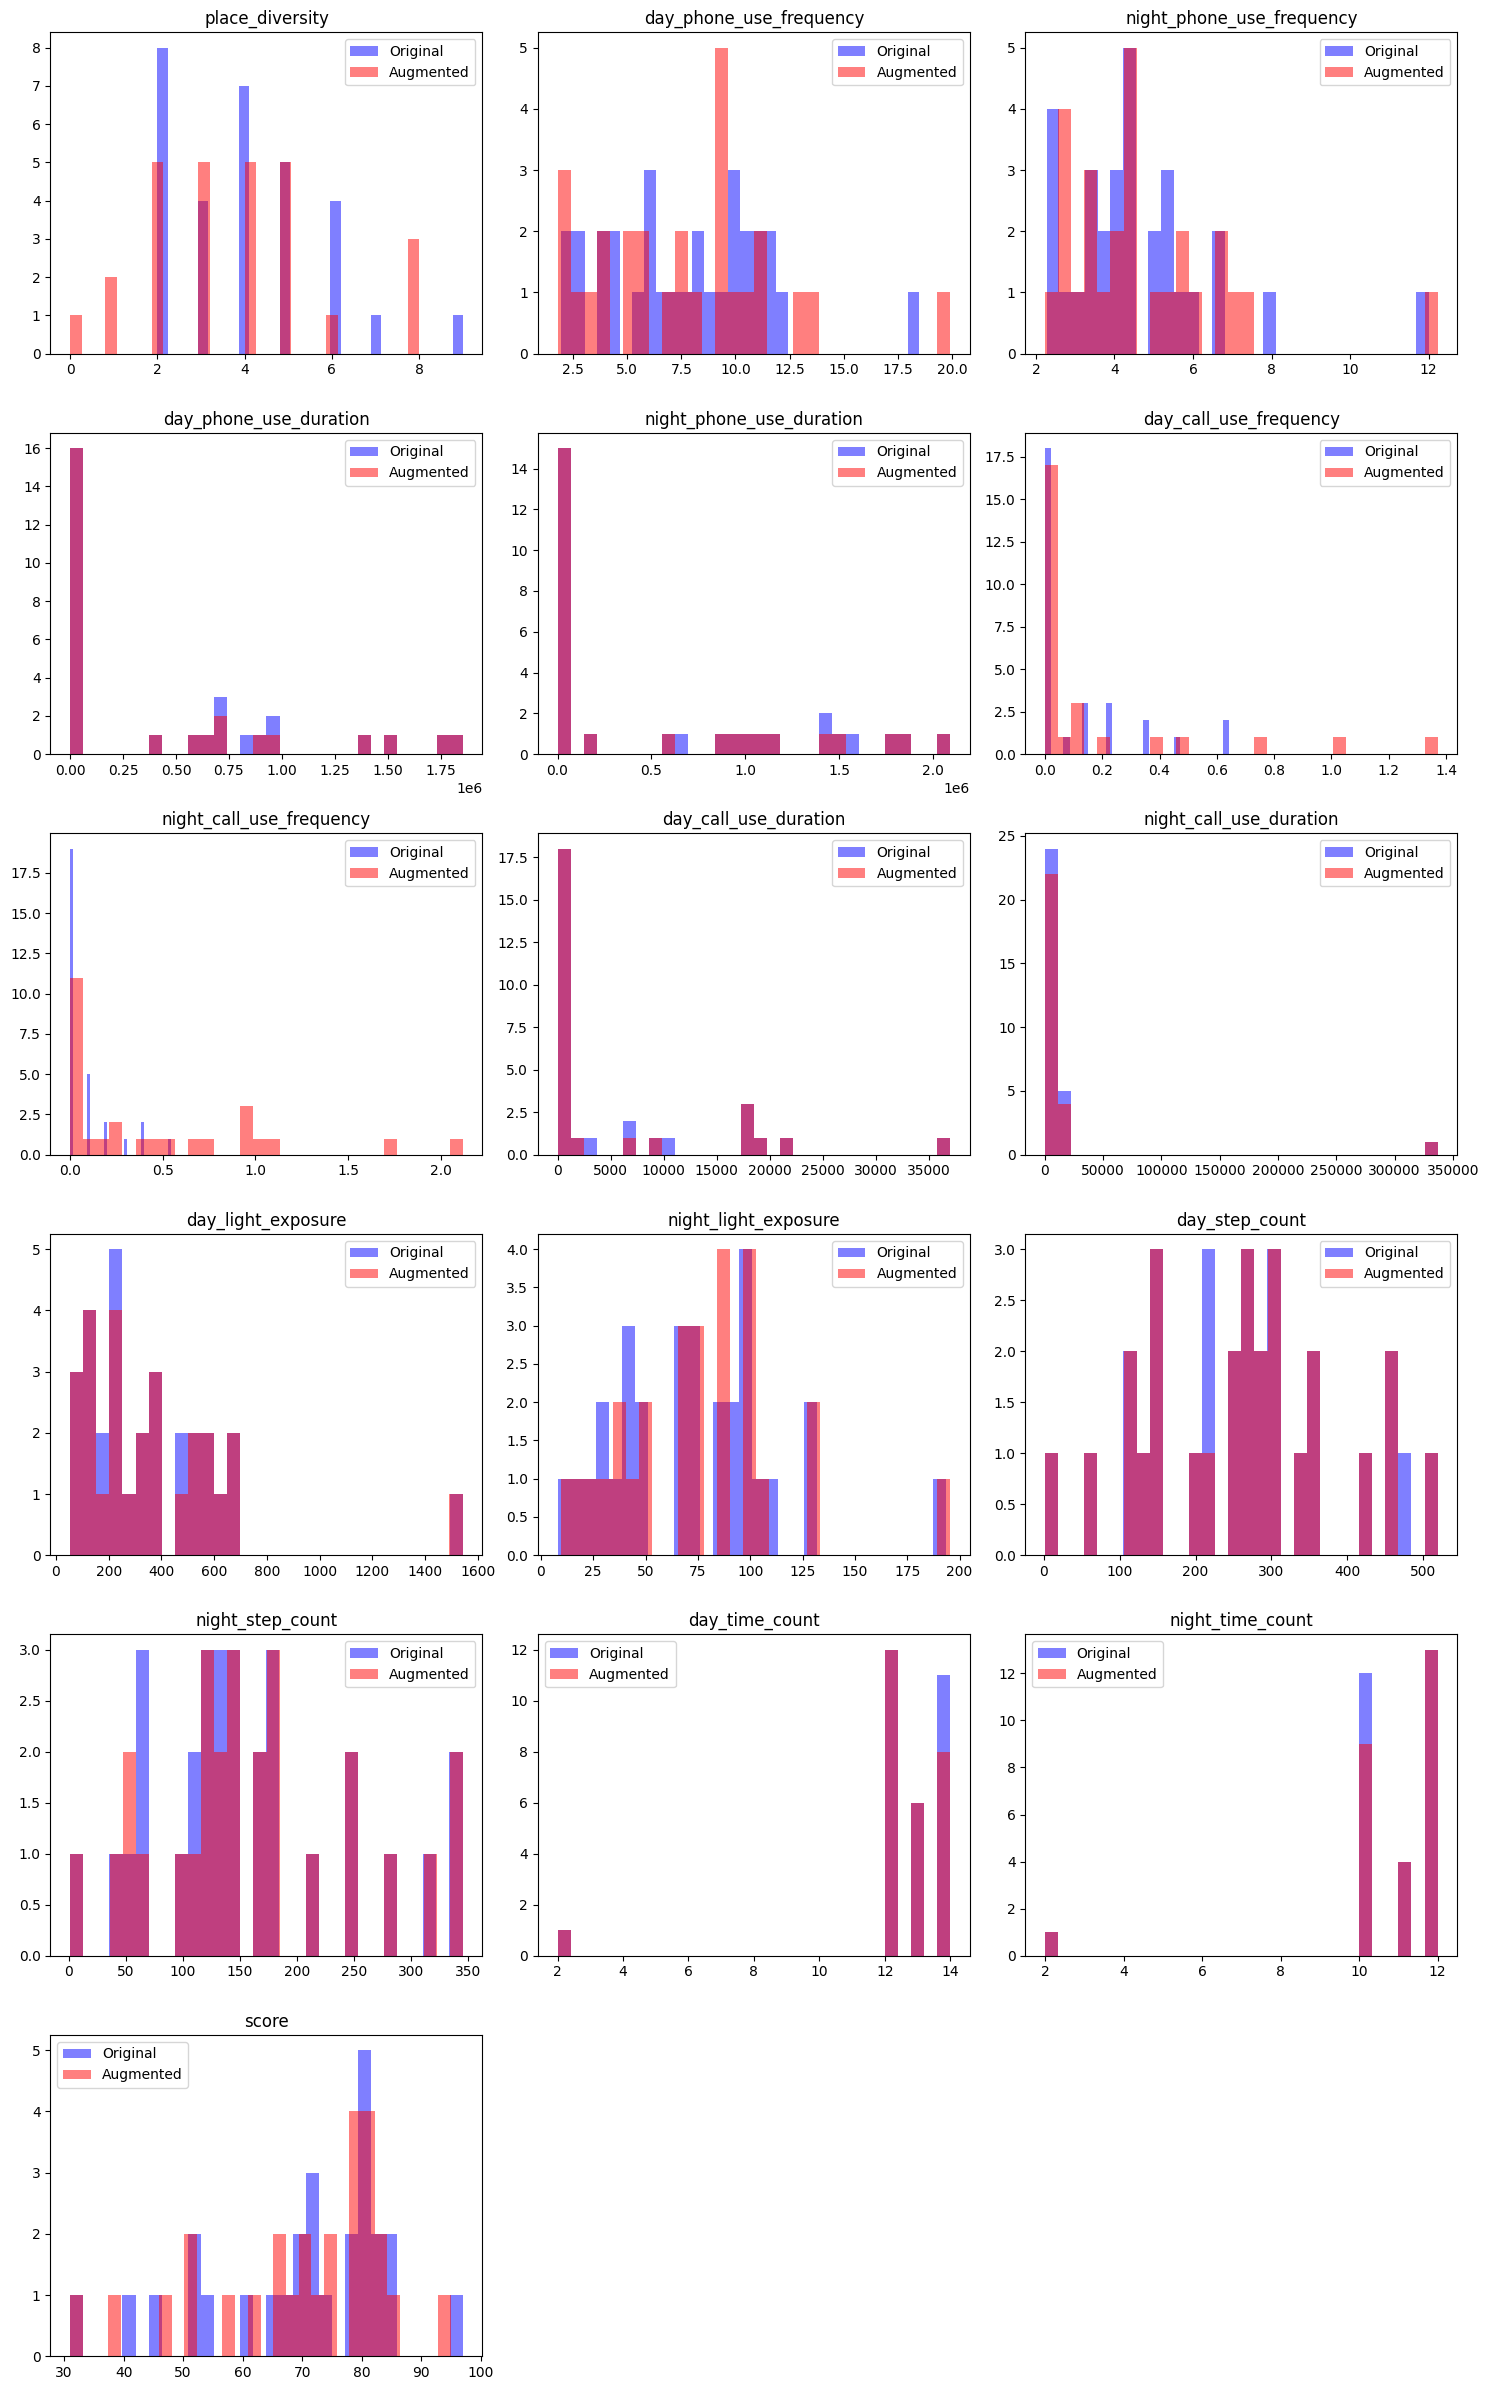

In [13]:
plot_data(augmented_noise_df)

## <font color = pink> SMOTE (데이터 샘플이 너무 적어서 테스트 불가)

In [36]:
'''
from imblearn.over_sampling import SMOTE
import pandas as pd

def apply_smote(data, target_column, exclude_columns=None):
    if exclude_columns is None:
        exclude_columns = []
    
    # 'score' 컬럼에 NaN이 있는 행을 제거
    data = data.dropna(subset=[target_column])
    
    # 제외할 컬럼을 제거
    data_features = data.drop(columns=exclude_columns + [target_column])

    # 데이터프레임에서 특성과 타겟을 분리
    y = data[target_column]
    
    # SMOTE 객체 생성
    smote = SMOTE(random_state=42)
    
    # SMOTE를 적용하여 오버샘플링
    X_resampled, y_resampled = smote.fit_resample(data_features, y)
    
    # 새로운 데이터프레임 생성
    resampled_df = pd.DataFrame(X_resampled, columns=data_features.columns)
    resampled_df[target_column] = y_resampled
    
    return resampled_df

exclude_columns = ['day_time_count', 'night_time_count']  # 제외할 컬럼 목록
augmented_df = apply_smote(combined_df, 'score', exclude_columns=exclude_columns)
'''

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 2, n_samples = 2

## <font color = pink> 오버샘플링

In [38]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import numpy as np

def apply_random_oversampling(data, target_column, exclude_columns=None, time_columns=None):
    if exclude_columns is None:
        exclude_columns = []
    if time_columns is None:
        time_columns = []

    # 'score' 컬럼에 NaN이 있는 행을 제거
    data = data.dropna(subset=[target_column])

    # 제외할 컬럼과 시간 컬럼을 임시 저장 후 제거
    data_features = data.drop(columns=exclude_columns + time_columns + [target_column])
    y = data[target_column].reset_index(drop=True)

    # 각 클래스의 샘플 수를 계산하고, 오버샘플링 전략을 설정
    class_counts = y.value_counts()
    sampling_strategy = {cls: max(class_counts[cls], 2) for cls in class_counts.index}

    # RandomOverSampler 객체 생성
    ros = RandomOverSampler(random_state=42, sampling_strategy=sampling_strategy)
    
    # RandomOverSampler를 적용하여 오버샘플링
    X_resampled, y_resampled = ros.fit_resample(data_features, y)
    
    # 새로운 데이터프레임 생성
    resampled_df = pd.DataFrame(X_resampled, columns=data_features.columns)
    resampled_df[target_column] = y_resampled

    # 오버샘플링 후 time_columns가 있으면 랜덤 쌍 추가
    if time_columns:
        pairs = np.array([(13, 11), (12, 12), (14, 10)])
        indices = np.random.choice(len(pairs), len(resampled_df))
        for col_name, pair in zip(time_columns, pairs.T):
            resampled_df[col_name] = pair[indices]

    return resampled_df

# 예제 사용
exclude_columns = []  # 완전히 제외할 컬럼 목록
time_columns = ['day_time_count', 'night_time_count']  # 오버샘플링 후 무작위로 추가할 시간 컬럼
augmented_over_sampling_df = apply_random_oversampling(
    final_df, 
    'score', 
    exclude_columns=exclude_columns, 
    time_columns=time_columns
)

In [39]:
augmented_over_sampling_df

,place_diversity,day_phone_use_frequency,night_phone_use_frequency,day_phone_use_duration,night_phone_use_duration,day_call_use_frequency,night_call_use_frequency,day_call_use_duration,night_call_use_duration,day_light_exposure,night_light_exposure,day_step_count,night_step_count,score,day_time_count,night_time_count
0,2,8.50000,6.00000,4.500000e+00,1.641670e+01,0.000000,0.000000,0.000000,0.0,318.3560,97.61720,256.50000,247.33300,60.0,12,12
1,6,11.50000,6.66667,8.583330e+00,8.500000e+00,0.000000,0.000000,0.000000,0.0,562.7370,69.08050,309.50000,125.41700,55.0,12,12
2,4,6.16667,4.41667,1.275000e+01,1.500000e+01,0.000000,0.000000,0.000000,0.0,119.1580,128.02000,282.91700,59.16670,74.0,13,11
3,3,4.58333,5.41667,1.383330e+01,4.333330e+00,0.000000,0.000000,0.000000,0.0,208.5990,129.53600,121.16700,175.16700,80.0,12,12
4,4,3.91667,2.50000,1.866670e+01,2.391670e+01,0.000000,0.000000,0.000000,0.0,112.7810,39.31780,132.66700,68.41670,40.0,14,10
5,4,2.33333,6.66667,1.150000e+01,1.366670e+01,0.000000,0.000000,0.000000,0.0,56.1907,17.59560,69.00000,344.41700,70.0,14,10
6,3,11.25000,5.25000,2.083330e+01,1.616670e+01,0.000000,0.000000,0.000000,0.0,286.2840,96.67940,284.33300,167.66700,52.0,13,11
7,4,10.08330,3.25000,1.583330e+01,1.883330e+01,0.000000,0.000000,0.000000,0.0,678.5270,88.60270,352.08300,126.08300,67.0,14,10
8,2,11.50000,5.66667,1.816670e+01,1.050000e+01,0.000000,0.000000,0.000000,0.0,207.6560,65.29940,308.75000,137.58300,46.0,14,10
9,6,12.25000,7.91667,1.525000e+01,2.108330e+01,0.000000,0.000000,0.000000,0.0,569.2610,88.92510,518.66700,246.08300,71.0,14,10


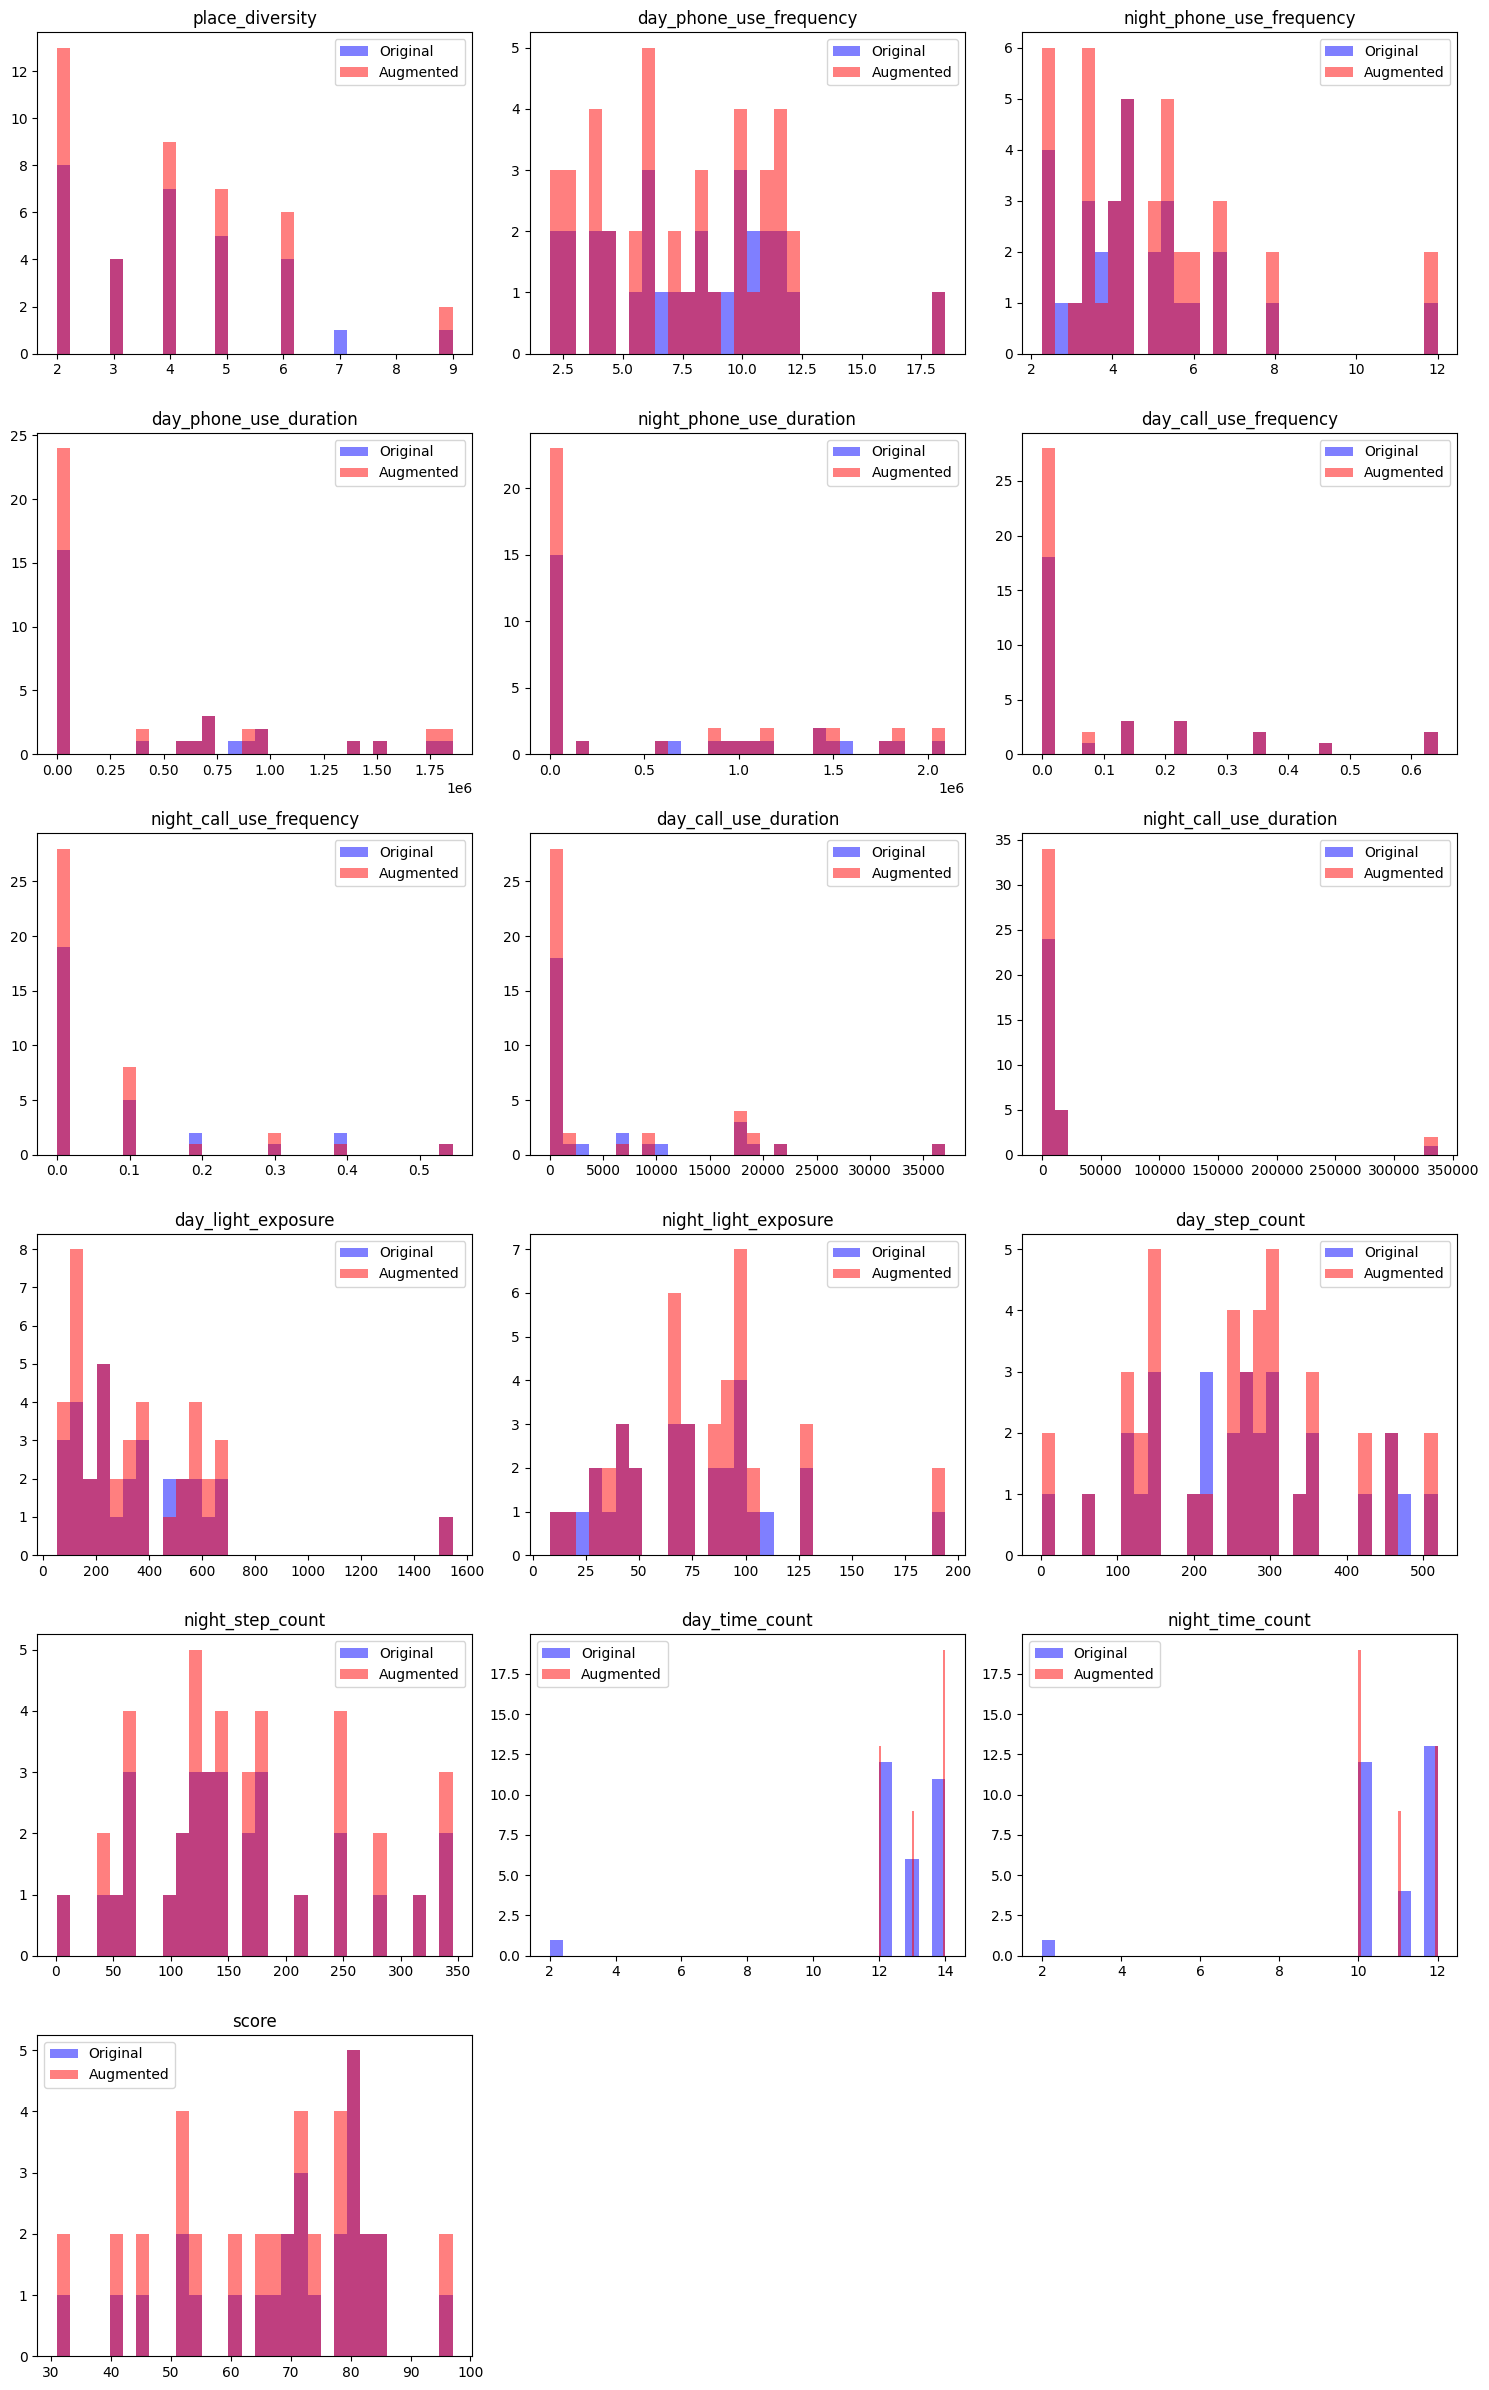

In [40]:
plot_data(augmented_over_sampling_df)

# <font color = lightblue> 증강된 데이터 합치기

In [43]:
# 두 데이터프레임을 수직으로 합치기 (위/아래로 연결)
combined_df = pd.concat([final_df, augmented_noise_df], ignore_index=True)

In [46]:
combined_df = combined_df.dropna(subset=['score'])
combined_df

In [48]:
# CSV 파일로 저장
combined_df.to_csv('/Users/ledu1017/python/FINAL-AI/score_prediction/model/augmentation_data.csv', index=False)